<a href="https://colab.research.google.com/github/RehanShabbir16/Modern_computer_vision_with_pytorch/blob/main/feed_forward_propogation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Feed Forward Propogation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
def feedForwardProp(inputs, outputs, weights):
  """
    Feed Forward Propogation

  Args:
    input: input data
    output: output data
    weight: weight of the network

  Return:
    return: mse of the network
  """
  pre_hidden = np.dot(inputs,weights[0])+ weights[1]
  hidden = 1/(1+np.exp(-pre_hidden))
  out = np.dot(hidden, weights[2]) + weights[3]
  mean_squared_error = np.mean(np.square(out - outputs))
  return mean_squared_error

In [ ]:
def tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

In [ ]:
#Rectified Linear Unit
def relu(x):
  return np.where(x>0,x,0)

relu(0)

array(0)

In [ ]:
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x))

In [ ]:
softmax([1,2,3])

array([0.09003057, 0.24472847, 0.66524096])

In [ ]:
# Mean Square Error
def mse(p,y):
  return np.mean(np.square(p-y))

In [ ]:
# Mean Absolute Error
def mae(p,y):
  return np.mean(np.abs(p-y))

In [ ]:
print("mse : ",mse(np.array([1,2,3]),np.array([3,2,1])))
print("mae : ",mae(np.array([1,2,3]),np.array([3,2,1])))

mse :  2.6666666666666665
mae :  1.3333333333333333


In [ ]:
# Binary cross Entropy
def bce(p,y):
  return -np.mean(y*np.log(p) + (1-y)*np.log(1-p))

In [ ]:
bce(np.array([0.9,0.8]),np.array([1,0]))

0.8573992140459634

In [ ]:
def categorical_cross_entropy(p, y):
 return -np.mean(np.log(p[np.arange(len(y)),y]))


In [ ]:
categorical_cross_entropy(np.array([[0.7,0.2,0.1],[0.3,0.5,0.2]]),np.array([1,0]))

1.4067053583800182

## Back Propogation

In [ ]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = feedForwardProp(inputs, outputs, original_weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feedForwardProp(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights, original_loss

In [ ]:
x = np.array([[1,1]])
y = np.array([[0]])

In [ ]:
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T,
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32),
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T,
    np.array([-0.5516], dtype=np.float32)
]

Text(0.5, 1.0, 'Loss over increasing number of epochs')

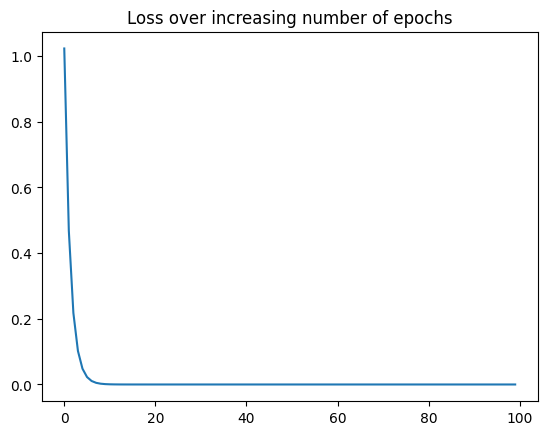

In [ ]:
losses = []
for epoch in range(100):
    W, loss = update_weights(x,y,W,0.01)
    losses.append(loss)
plt.plot(losses)
plt.title('Loss over increasing number of epochs')